In [16]:
import matplotlib.pyplot as plt
import numpy as np
import csv

### Settings
image_orig_size = 32
z_dim = 64
vae_path = './models/'


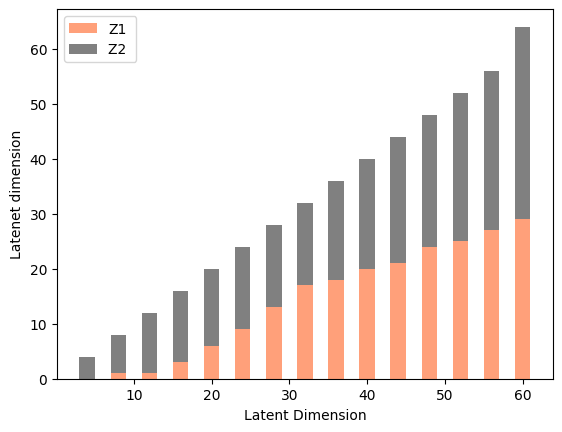

In [17]:
beta_rec = 1000.0 # 98304.0 10000.0
batch_size = 1024
beta_kl = 0.0 # 1.0 25.0
vae_model = "ResBasedVAE" # "CNNBasedVAE"
weight_cross_penalty = 0.0
beta_task = 0.0 # task aware
VAEepoch = 89
norm_sample = False # False True
rand_crop = True # 'True' or '' or 'False'
dataset = 'cifar10'
VAE_seed = 2
lr = 1e-3
if norm_sample:
    model_type = "VAE"
else:
    model_type = "DAE"

### load csv file
### Distributed Task-aware
sucess_rate = []
z_list = []
rep_dims = [[], [], []]
z_list.append([])
sucess_rate.append([])
vae_name = f'{dataset}_{z_dim}_taskaware_{model_type}_{vae_model}_kl{beta_kl}_rec{beta_rec}_task{beta_task}_bs{batch_size}_cov{weight_cross_penalty}_lr{lr}_seed{VAE_seed}-ep{VAEepoch}.pth'
csv_name = vae_name.replace('.pth', '.csv')#.replace('/DVAE', '_DVAE')

with open('../csv_data/' + csv_name, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        if row[0] == 'dpca_dim':
            continue
        else:
            z_list[-1].append(int(row[0]))
            sucess_rate[-1].append(float(row[-1]))
            rep_dims[0].append(int(row[1]))
            rep_dims[1].append(int(row[2]))
            rep_dims[2].append(int(row[3]))

rep_dims = np.array(rep_dims)

### stacked bar plot
colors = ['blue', 'orange', 'green']
plt.bar(z_list[0], rep_dims[0], 2, color='lightsalmon', label='Z1')
plt.bar(z_list[0], rep_dims[1], 2, color='grey', label='Z2 ', bottom=rep_dims[0])
plt.ylabel("Latenet dimension")
plt.xlabel("Latent Dimension")
plt.legend(loc="upper left")
# plt.title('Importance of representations (fully recon)')
plt.savefig('../plots/cifar10/z_importance.png', bbox_inches='tight', dpi=300)
plt.show()

In [18]:
### Joint
z_dim = 64
beta_rec = 1000.0 # 98304.0 10000.0
batch_size = 1024
beta_kl = 0.01 # 1.0 25.0
vae_model = "CNNBasedVAE" # "SVAE" or "CNNBasedVAE"
weight_cross_penalty = 0.0
beta_task = 0.0 # task aware
VAEepoch = 299
VAE_seed = 2
lr = 1e-4
rep_dims = [[], [], []]
z_list.append([])
sucess_rate.append([])
vae_name = f'{dataset}_{z_dim}_taskaware_{model_type}_{vae_model}_kl{beta_kl}_rec{beta_rec}_task{beta_task}_bs{batch_size}_cov{weight_cross_penalty}_lr{lr}_seed{VAE_seed}-ep{VAEepoch}.pth'
csv_name = vae_name.replace('.pth', '.csv').replace('/DVAE', '_DVAE')

with open('../csv_data/' + csv_name, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        if row[0] == 'dpca_dim':
            continue
        else:
            z_list[-1].append(int(row[0]))
            sucess_rate[-1].append(float(row[-1]))
            rep_dims[0].append(int(row[1]))
            rep_dims[1].append(int(row[2]))
            rep_dims[2].append(int(row[3]))

rep_dims = np.array(rep_dims)


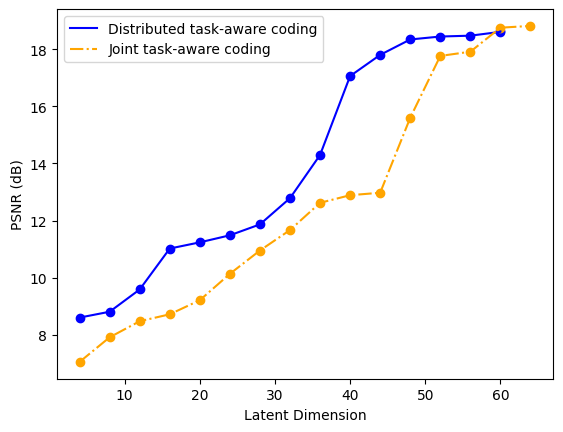

In [19]:
### plot

### DAE
label = ['Distributed task-aware coding', 'Joint task-aware coding'] #+ ['Fully reconstruction']
color_list = ['b', 'orange'] # , 'r']
line_style = ['-', '-.'] #, '-.']
for l, z, sr, c, ls in zip(label, z_list, sucess_rate, color_list, line_style):
    plt.plot(z, sr, c=c, label=l, linestyle=ls)
    plt.scatter(z, sr, c=c)

### real learning model
# plt.plot([8, 16, 32, 64], [16.25, 17.24, 18.32, 18.63], c='purple', label='Real distributed autoencoder', linestyle='--')
# plt.scatter([8, 16, 32, 64], [16.25, 17.24, 18.32, 18.63], c='purple')

plt.ylabel("PSNR (dB)")
plt.xlabel("Latent Dimension")
plt.legend()
# plt.title(f"Success Rate vs Latent Dimension") # \n beta kl={beta_kl}, beta_rec={beta_rec},task weight={task_weight}, beta_cor={weight_cross_penalty}")
plt.savefig('../plots/cifar10/dpca_acc.png', bbox_inches='tight', dpi=300)
plt.show()